<a href="https://colab.research.google.com/github/KKOUWE/NumMet-Network-Design-Physarum-polycephalum-Ph/blob/main/ImportedMapV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

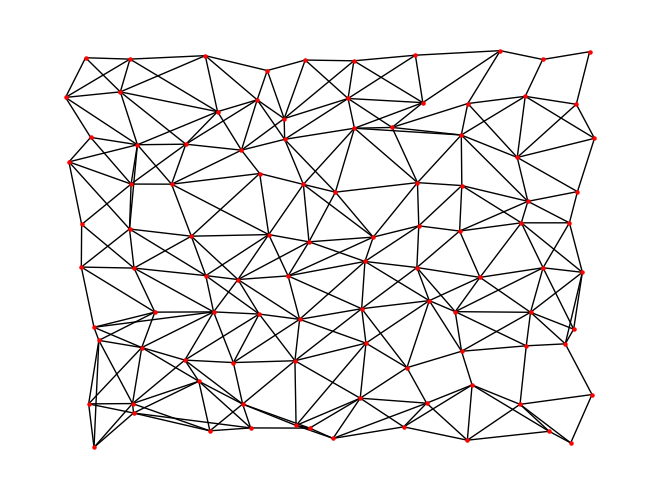

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as panda
import networkx as nx

## this file has to be able to add a stochastic array of points over a given map,
## together with foodsources (FS)

# Create an empty graph
G = nx.Graph()

# Define the grid dimensions
rows, cols = 10, 10
min_distance = np.sqrt(2)
# Add nodes in a 10x10 grid
for i in range(rows):
    for j in range(cols):
        G.add_node((i, j))
        # Set up positions for a 10x10 grid
        # standerd deviation
        sd = 0.2
        pos = {(i, j): (j + np.random.normal(loc=0,scale=sd, size=None) , -i + np.random.normal(loc=0,scale=sd, size=None) ) for i in range(rows) for j in range(cols)}
        # Check all other nodes in the grid to see if they meet the distance condition # lots of room for optimizatin in this loop
        for x in range(rows):
            for y in range(cols):
                pos_center = pos.get((i,j))
                pos_nb = pos.get((x,y))
                if pos_nb != pos_center:
                    pos_center_i = pos_center[0]
                    pos_center_j = pos_center[1]
                    pos_nb_i = pos_nb[0]
                    pos_nb_j = pos_nb[1]
                # Calculate distance
                    distance = np.sqrt((pos_center_i- pos_nb_i) ** 2 + (pos_center_j - pos_nb_j) ** 2)
                    if distance <= min_distance:
                        G.add_edge((i, j), (x, y))



# Draw the graph
plt.figure()
nx.draw(G, pos, node_size=5, node_color="red", with_labels=False)
plt.show()
## It works !!

## Now we need to implement food sources = FS and the tube size = TS. Also this tube size has to
# change with every iteration dt. according to

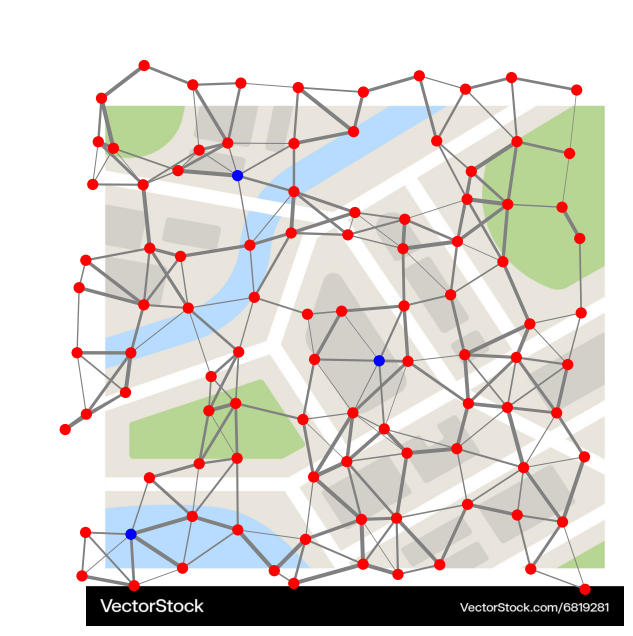

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as panda
import networkx as nx
from PIL import Image

# Load your map image (replace 'map_image.png' with your actual image path)
map_image_path = '/content/MAP1.jpg'  # Update this with the path to your map
map_image = Image.open(map_image_path)

# Create an empty graph
G = nx.Graph()

# Define the grid dimensions and settings
rows, cols = 10, 10
min_distance = np.sqrt(2)
sd = 0.2

# Generate positions with slight random offsets and add nodes
pos = {(i, j): (j + np.random.normal(loc=0, scale=sd), -i + np.random.normal(loc=0, scale=sd))
       for i in range(rows) for j in range(cols)}

# Add nodes and edges based on the distance condition
for (i, j), pos_center in pos.items():
    G.add_node((i, j), pos=pos_center)  # Add node with position attribute
    for (x, y), pos_nb in pos.items():
        if (i, j) != (x, y):
            # Calculate distance
            distance = np.sqrt((pos_center[0] - pos_nb[0]) ** 2 + (pos_center[1] - pos_nb[1]) ** 2)
            if distance <= min_distance:
                G.add_edge((i, j), (x, y))

# Define food sources (FS) - mark some nodes as food sources
food_sources = [(2, 3), (5, 5), (8, 1)]  # example food source positions
for fs in food_sources:
    if fs in G.nodes:
        G.nodes[fs]['food_source'] = True

# Function to update tube sizes (TS) over time
def update_tube_size():
    # Update the 'width' attribute of edges randomly or by some rule
    for u, v in G.edges():
        G[u][v]['width'] = np.random.uniform(0.5, 3.0)  # Example: random tube size

# Update tube sizes once at the start (or call in a loop for dynamic updates)
update_tube_size()

# Plot the graph on the map
plt.figure(figsize=(8, 8))
plt.imshow(map_image, extent=[0, cols, -rows, 0])  # Adjust extent as needed to fit the grid/map alignment

# Draw nodes and edges
edge_widths = [G[u][v].get('width', 1) for u, v in G.edges()]  # Use edge widths
node_colors = ["blue" if G.nodes[node].get("food_source") else "red" for node in G.nodes()]

nx.draw(G, pos, node_size=50, node_color=node_colors, edge_color="gray", width=edge_widths, with_labels=False)

plt.show()
